In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [49]:
df = pd.read_csv("data.csv")

In [50]:
df

,points,assists,rebounds
0,18,3,15
1,19,4,14
2,14,5,10
3,14,4,8
4,11,7,14
5,20,8,13
6,28,7,9
7,30,6,5
8,31,9,4
9,35,12,11


In [51]:
def random_centroids(all_vals, K):
    centroids = []
    #Place K centroids at random locations
    for i in range(K):
        centroid = all_vals[rand.randint(0, 149)]
        centroids.append(centroid)
    return centroids

In [52]:
def assign_cluster(all_vals, centroids):
    assignments = []

    for data_point in all_vals:
        dist_point_clust = []

        for centroid in centroids:
            d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(d_clust)
        
        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments

In [53]:
def new_centroids(all_vals, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(all_vals)):
                if (assignments[x] == i):
                    pt_cluster.append(all_vals[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

    return new_centroids

In [54]:
def sse(all_vals, assignments, centroids):
    errors = []
    
    for i in range(len(all_vals)):
        #get assigned centroid for each point
        centroid = centroids[assignments[i]]
    
        #compute the distance (error) between one point and its closest centroid
        error = np.linalg.norm(np.array(all_vals[i]) - np.array(centroid))
        
        #append squared error to the list of error
        errors.append(error**2)
        
    #and sum up all the errors
    sse = sum(errors)
    
    return sse

In [55]:
def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3) ):
    it = -1
    all_sse = []
    assignments = []
    
    #Place K centroids at random locations
    centroids = random_centroids(all_vals, K)
   
    #Until algorithm converges (needs two iterations before comparing the errors)
    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        #Assign all data points to the closest center
        assignments = assign_cluster(all_vals, centroids)
        
        #Compute the new centroids
        centroids = new_centroids(all_vals, centroids, assignments, K)
        
        #Compute SSE
        sse_kmeans = sse(all_vals, assignments, centroids)
        all_sse.append(sse_kmeans)        
        
     
    return (assignments, centroids, all_sse, it+1)

In [56]:
from sklearn.datasets import load_digits
digits_data = load_digits().data

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


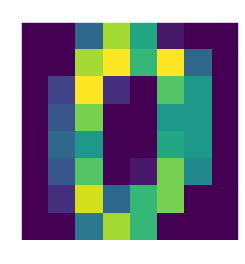

In [57]:
import matplotlib.pyplot as plt
print(digits_data[0])
sample_digit = digits_data[0].reshape(8, 8)
plt.imshow(sample_digit)
plt.title("Digit image")
plt.show()

In [58]:
from sklearn.preprocessing import scale
scaled_data = scale(digits_data)
print(scaled_data)
Y = load_digits().target
print(Y)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
[0 1 2 ... 8 9 8]


In [59]:
from sklearn.cluster import KMeans
k = 10
kmeans_cluster = KMeans(init = "random", n_clusters = k, n_init = 10, random_state = 0)

In [60]:
def bench_k_means(estimator, name, data):
    initial_time = time()
    estimator.fit(data)
    print("Initial-cluster: " + name)
    print("Time taken: {0:0.3f}".format(time() - initial_time))
    print("Homogeneity: {0:0.3f}".format( metrics.homogeneity_score(Y, estimator.labels_)))
    print("Completeness: {0:0.3f}".format( metrics.completeness_score(Y, estimator.labels_)))
    print("V_measure: {0:0.3f}".format( metrics.v_measure_score(Y, estimator.labels_)))
    print("Adjusted random: {0:0.3f}".format( metrics.adjusted_rand_score(Y, estimator.labels_)))
    print("Adjusted mutual info: {0:0.3f}".format(metrics.adjusted_mutual_info_score(Y, estimator.labels_)))
    print("Silhouette: {0:0.3f}".format(metrics.silhouette_score(data, estimator.labels_, metric='euclidean',
                                        sample_size=300)))

In [61]:
kmeans_cluster = KMeans(init="random", n_clusters=k, n_init=10, random_state=0)
bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data)
kmeans_cluster = KMeans(init="k-means++", n_clusters=k,n_init=10, random_state=0)
bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data)

TypeError: 'module' object is not callable

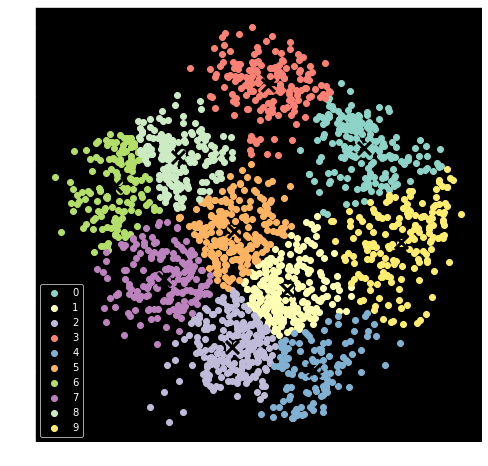

In [62]:
from sklearn.decomposition import PCA
import numpy as np
# Reducing the dataset
pca = PCA(2)
reduced_data = pca.fit_transform(digits_data)
kmeans_cluster.fit(reduced_data)
# Calculating the centroids
centroids = kmeans_cluster.cluster_centers_
label = kmeans_cluster.fit_predict(reduced_data)
unique_labels = np.unique(label)
# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0], reduced_data[label == i, 1], label=i)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='k', zorder=10)
plt.legend()
plt.show()